## 1．データ収集

In [3]:
import pandas as pd
df = pd.read_csv('data/TC_ReCo_detail_descriptor.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          60 non-null     object 
 1   polytyp       33 non-null     object 
 2   Tc            60 non-null     float64
 3   ref           60 non-null     object 
 4   author        60 non-null     object 
 5   link          36 non-null     object 
 6   comment       7 non-null      object 
 7   polytyp2      60 non-null     object 
 8   C_R           60 non-null     float64
 9   C_T           60 non-null     float64
 10  vol_per_atom  60 non-null     float64
 11  Z             60 non-null     float64
 12  f4            60 non-null     float64
 13  d5            60 non-null     float64
 14  L4f           60 non-null     float64
 15  S4f           60 non-null     float64
 16  J4f           60 non-null     float64
 17  (g-1)J4f      60 non-null     float64
 18  (2-g)J4f      60 non-null     fl

### 数値カラムから目的変数と説明変数を作成

In [5]:
import numpy as np

In [16]:
X_columns = df.select_dtypes(np.number).columns
TARGET_NAME = 'Tc'
X = df[X_columns]
y = df[TARGET_NAME]

## 2．データ加工

### 標準化

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.set_output(transform="pandas")
X = scaler.fit_transform(X)

## 3．データからの学習

In [49]:
# KFold
from sklearn.model_selection import KFold
k = 10
cv = KFold(n_splits=k, random_state=0, shuffle=True)
# make model
from sklearn.kernel_ridge import KernelRidge
kr = KernelRidge(alpha=1, gamma=1 ,kernel="rbf")
# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-6, 0, 11),
              'gamma': np.logspace(-5, 0, 11)}
reg_cv = GridSearchCV(estimator=kr, cv=cv, param_grid=param_grid)

# learning
reg_cv.fit(X, y)

# predict
y_pred = reg_cv.predict(X)

In [47]:
print(f"best params: {reg_cv.best_params_}")
print(f"best score: {reg_cv.best_score_}")

best params: {'alpha': 1e-06, 'gamma': 0.00031622776601683794}
best score: 0.9999987876869334


In [45]:
reg_cv.best_estimator_

KernelRidge(alpha=1e-06, gamma=0.00031622776601683794, kernel='rbf')

In [39]:
{'alpha': np.logspace(-6, 0, 11),
'gamma': np.logspace(-5, 0, 11)}

{'alpha': array([1.00000000e-06, 3.98107171e-06, 1.58489319e-05, 6.30957344e-05,
        2.51188643e-04, 1.00000000e-03, 3.98107171e-03, 1.58489319e-02,
        6.30957344e-02, 2.51188643e-01, 1.00000000e+00]),
 'gamma': array([1.00000000e-05, 3.16227766e-05, 1.00000000e-04, 3.16227766e-04,
        1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
        1.00000000e-01, 3.16227766e-01, 1.00000000e+00])}

In [ ]:
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [51]:
from sklearn.metrics import r2_score
print(f"R2 score: {r2_score(y, y_pred)}")

R2 score: 0.9999998340661281


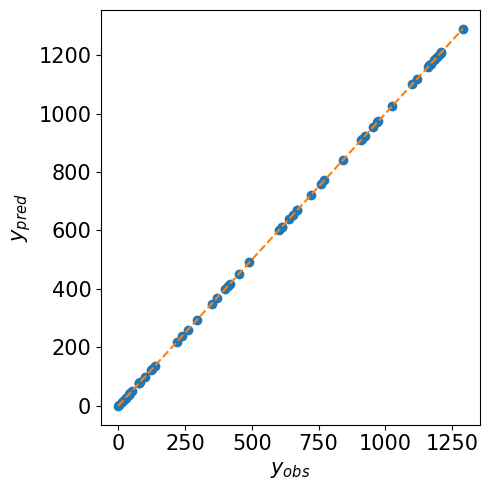

In [54]:
from regression_misc import plot_y_yp
plot_y_yp(y, y_pred)

## RandomForestRegressor

In [84]:
import pandas as pd
df = pd.read_csv('data/TC_ReCo_detail_descriptor.csv')

X_columns = df.select_dtypes(np.number).columns
TARGET_NAME = 'Tc'
X = df[X_columns]
y = df[TARGET_NAME]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.set_output(transform="pandas")
X = scaler.fit_transform(X)

# hold-out
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [85]:
# make model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
rfr = RandomForestRegressor(n_estimators=100, max_depth=5)
# learning
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
# score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [86]:
print("mse: {}".format(mse))
print("mae: {}".format(mae))

mse: 6610.047965928705
mae: 50.385450000000006


In [87]:
len(y)

60

In [88]:
len(y_pred)

30

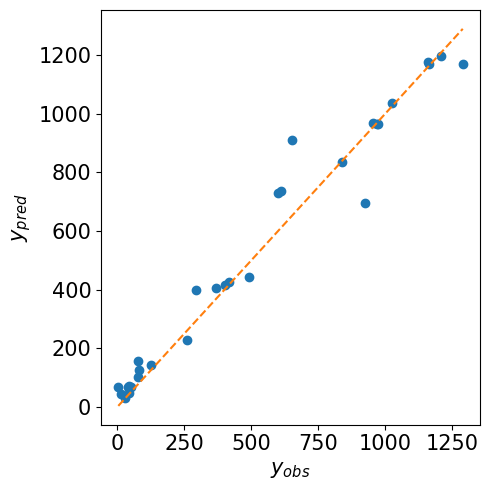

In [89]:
from regression_misc import plot_y_yp
plot_y_yp(y_test, y_pred)